In [ ]:
#Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [ ]:
#чтение файла
df=pd.read_csv('test.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event_id       320 non-null    int64 
 1   event_date     320 non-null    object
 2   customer_id    320 non-null    int64 
 3   is_attend      320 non-null    int64 
 4   group_ids      320 non-null    int64 
 5   teacher_ids    320 non-null    int64 
 6   attendance_id  320 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ KB
None


In [ ]:
print(df['event_date'])

0      2020-05-22
1      2020-06-03
2      2020-06-17
3      2020-06-11
4      2020-06-19
          ...    
315    2020-06-19
316    2020-05-23
317    2020-06-09
318    2020-07-08
319    2020-06-26
Name: event_date, Length: 320, dtype: object


In [ ]:
#Преобразование колонки event_date в формат datetime
df['event_date']=pd.to_datetime(df['event_date'],format='%Y-%m-%d')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_id       320 non-null    int64         
 1   event_date     320 non-null    datetime64[ns]
 2   customer_id    320 non-null    int64         
 3   is_attend      320 non-null    int64         
 4   group_ids      320 non-null    int64         
 5   teacher_ids    320 non-null    int64         
 6   attendance_id  320 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 17.6 KB
None


In [ ]:

is_attend_mean=df['is_attend'].mean()
print(is_attend_mean)

0.825


In [ ]:
#Посчитаем среднюю посещаемость занятий каждого учителя,сначала самых посещаемых ,с округлением до 2го знака
is_attend_by_teacher=df.groupby('teacher_ids')['is_attend'].mean().sort_values(ascending=False).round(2)
print(is_attend_by_teacher)

teacher_ids
6    0.88
5    0.87
4    0.83
3    0.74
7    0.73
Name: is_attend, dtype: float64


In [ ]:
#Посчитаем среднюю посещаемость занятий каждой группы,сначала выведем самых посещающих ,с округлением до 2го знака
is_attend_by_group=df.groupby('group_ids')['is_attend'].mean().sort_values(ascending=False).round(2)
print(is_attend_by_group)

group_ids
3    0.87
2    0.85
5    0.83
1    0.74
Name: is_attend, dtype: float64


In [ ]:
#Выведем индентификаторы учеников с самой низкой посещаемостью,посчитаем их среднюю посещаемость с округлением до 2го знака
is_attend_by_student=df.groupby('customer_id')['is_attend'].mean().sort_values(ascending=True).round(2)
print(is_attend_by_student)

customer_id
36     0.00
580    0.25
725    0.33
597    0.33
595    0.33
258    0.50
578    0.50
681    0.50
249    0.57
587    0.60
247    0.62
260    0.67
30     0.67
145    0.67
383    0.67
14     0.67
593    0.67
379    0.70
192    0.79
137    0.83
183    0.83
49     0.83
335    0.83
234    0.86
26     0.87
493    0.90
419    0.92
12     0.93
345    1.00
37     1.00
654    1.00
42     1.00
47     1.00
52     1.00
590    1.00
94     1.00
586    1.00
99     1.00
308    1.00
135    1.00
152    1.00
452    1.00
435    1.00
197    1.00
401    1.00
279    1.00
700    1.00
360    1.00
354    1.00
496    1.00
295    1.00
Name: is_attend, dtype: float64


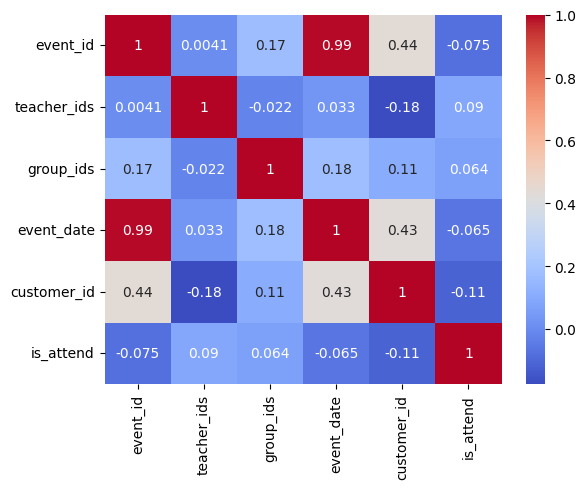

In [ ]:
#Постороим корреляционную матрицу для выявления зависимостей
corr_matrix=df[['event_id','teacher_ids','group_ids','event_date','customer_id','is_attend']].corr()
sb.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()


В большей степени прослеживается зависимость между учениками,группами,датами занятий и самими занятиями(предметами),что логично,что ученики посещают какие-то конкретные кружки в определенные дни.Однако,эта зависимость все равно небольшая.Зависимость посещаемости от конкретного преподавателя здесь почти не прослеживается.

In [ ]:
#Чтобы подтвердить/опровергнуть вывод,сделанный сверху,рассчитаем корреляцию Спирмена и Пирсона
x=df['is_attend']
y=df['teacher_ids']
pearson_corr,_=st.pearsonr(x,y)
print(f'Коэффициент корреляции Пирсона:{pearson_corr.round(3)}')


Коэффициент корреляции Пирсона:0.09


In [ ]:
x=df['is_attend']
y=df['teacher_ids']
spearman_corr,_=st.spearmanr(x,y)
print(f'Коэффициент корреляции Пирсона:{spearman_corr.round(3)}')

Коэффициент корреляции Пирсона:0.105


Корреляция близка к 0,что говорит об отстутствии зависимости

In [ ]:
#Выдвинем несколько гипотез и подтвердим или опровергнем их

#1.Н0(нулевая гипотеза)- посещаемость зависит от конкретного учителя

t_stat,p_value=st.ttest_1samp(df['teacher_ids'],is_attend_mean)
if p_value <= 0.05 :
  print('Посещаемость не зависит от конкретного преподавателя,нулевая гипотеза (Н0) отклоняется')
else:
  print('Посещаемость зависит от конкретного преподавателя,нулевая гипотеза принимается')


Посещаемость не зависит от конкретного преподавателя,нулевая гипотеза (Н0) отклоняется


In [ ]:
#2.Н0(нулевая гипотеза)- посещаемость зависит от кружка (направления его деятельности)
t_stat,p_value=st.ttest_1samp(df['event_id'],is_attend_mean)
if p_value <= 0.05 :
  print('Посещаемость не зависит от кружка,нулевая гипотеза (Н0) отклоняется')
else:
  print('Посещаемость зависит от кружка,нулевая гипотеза принимается')

Посещаемость не зависит от кружка,нулевая гипотеза (Н0) отклоняется


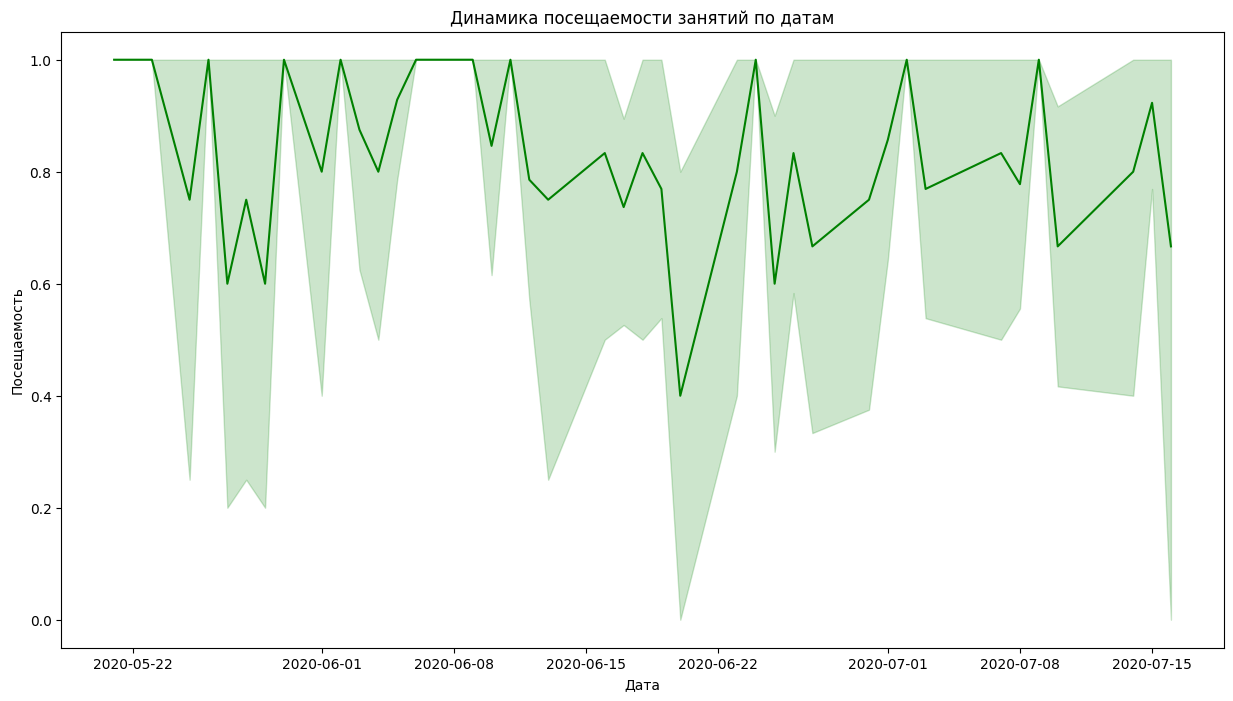

In [ ]:
#график посещаемости учеников
plt.figure(figsize=(15,8))
sb.lineplot(data=df,x=df['event_date'],y=df['is_attend'],color='green')
plt.xlabel('Дата')
plt.ylabel('Посещаемость')
plt.title('Динамика посещаемости занятий по датам')
plt.show()

Посещаемость довольно высокая-82,5 %.Хуже всех посещаемость у учащегося с id 36,самая низкая посещаемость занятий у учителя с id 7,самая хорошая посещаемость у группы 3.
Тест показал,посещаемость не зависит от конкретного преподавателя и от кружка.Однако у каких-то преподавателей она ниже.Возможно влияют другие факторы,например,общее количество занятий, время/дата проведения уроков, болезнь и т.д.